# Packages and Directory

In [1]:
import os
import sys
import random
import math
from collections import Counter, defaultdict
import itertools
import re
import pandas as pd
import time
import numpy as np
from scipy import ndimage
import image
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.getcwd()
if ROOT_DIR.endswith("samples/inclusion"):
    # Go up two levels to the repo root
    ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))
print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)
import utils
import cv2 as cv
import visualize
from visualize import display_images
import model as modellib
from model import log

import inclusion
import tqdm
from tqdm import tqdm_notebook as tqdm
import eval_metrics

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
INCLUSION_WEIGHTS_PATH = "/Users/kwassibenocharlesdokodjo/OneDrive - Capgemini/Mes_Projets/Eramet Images Metallo/intelligence artificielle/programmeIA/Mask_RCNN-2.1/samples/inclusion/database/x15u5.h5"  # TODO: update this path

/Users/kwassibenocharlesdokodjo/OneDrive - Capgemini/Mes_Projets/Eramet Images Metallo/intelligence artificielle/programmeIA/Mask_RCNN-2.1


Using TensorFlow backend.


In [2]:
config = inclusion.InclusionConfig()
INCLUSION_DIR = "/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test"
INCLUSION_DIR
#INCLUSION_DIR = os.path.join(os.path.dirname(os.path.dirname(ROOT_DIR)), "BaseIA/x15u5_bis")

'/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test'

# Load Dataset

In [3]:
# Load validation dataset
dataset = inclusion.InclusionDataset()
dataset.load_inclusion(INCLUSION_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/1.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/3.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/4.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/5.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/6.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/7.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/8.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/9.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/10.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/11.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/12.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/13.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/14.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/15.jpg
/Users/kwassibenoch

/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/100(2).jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/100.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/101.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/102.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/103.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/104.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2018-10-19_1.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2018-10-19_2.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2018-10-19_3.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2018-10-19_4.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2018-10-19_5.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2018-10-19_6.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2018-10-19_7.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/2018

/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv650.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv651.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv652.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv654.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv655.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv656.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv657.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv658.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv659.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv660.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv661.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv662.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv663.jpg
/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/Tv664.jpg
/Users/kwassibenocharlesdokodjo/De

# Test Canny Detector

In [4]:
image_id = 0

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config,
                           image_id, use_mini_mask=False)
molded_images = np.expand_dims(modellib.mold_image(image, config), 0)

eval_metrics.Laplacian_Gaussian_effect_on_mask(gt_mask).shape

#visualize.display_instances(image, gt_bbox, gt_mask, gt_class_id, dataset.class_names, title='Ground_truth')

(1024, 1024, 13)

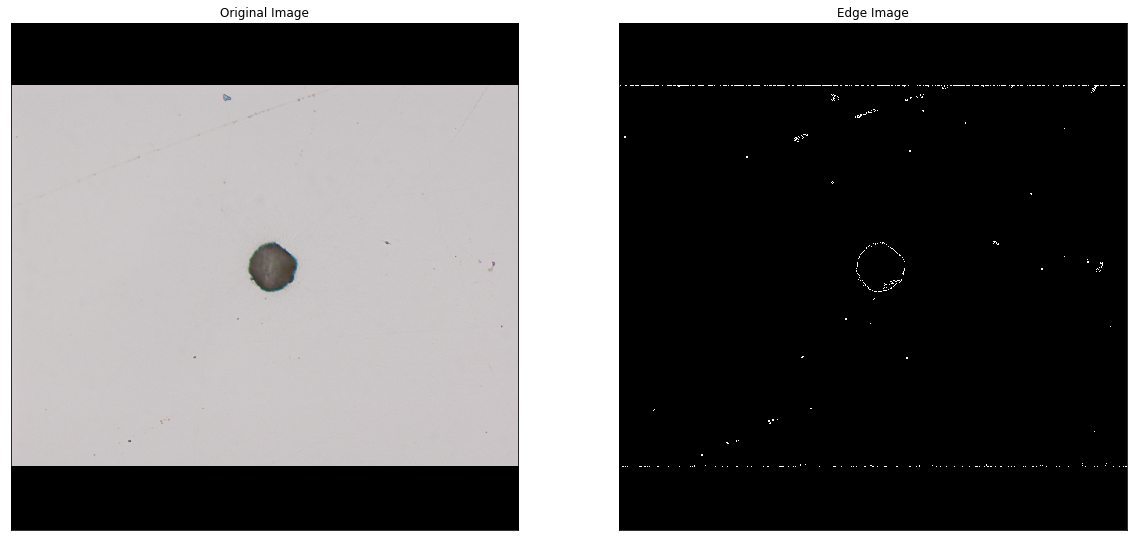

In [5]:
image_gray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
edges = cv.Canny(image_gray, 10, 95)

plt.figure(figsize=(20,15))

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [10]:
gt_mask.shape[2]

13

In [11]:
ious = []
for image_id in tqdm(dataset.image_ids):
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config,
                           image_id, use_mini_mask=False)
    
    gt_mask = eval_metrics.gaussian_filter_on_mask(gt_mask)
    gt_mask_ = [eval_metrics.fill_edges(gt_mask[:,:,i]) for i in range(gt_mask.shape[2])]
    gt_mask_ = np.array(gt_mask_)
    
    minVal = 0.1
    maxVal = 0.9
    edges = eval_metrics.canny_transform(image, minVal,maxVal)
    edges = eval_metrics.tensorize(edges, gt_mask.shape[2])

    ious.append(np.mean(eval_metrics.eval_segmentation(gt_mask, edges)))

In [12]:
print(np.mean(ious))
print(np.std(ious))

3.2407135905271707
4.682812239622321


In [6]:
ious = []
for image_id in tqdm(dataset.image_ids):
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config,
                           image_id, use_mini_mask=False)
    
    #gt_mask = eval_metrics.gaussian_filter_on_mask(gt_mask)
    
    minVal = 0.1
    maxVal = 0.9
    edges = eval_metrics.canny_transform(image, minVal,maxVal)
    edges = eval_metrics.fill_edges(edges)
    edges = eval_metrics.tensorize(edges, gt_mask.shape[2])

    ious.append(np.mean(eval_metrics.eval_segmentation(gt_mask, edges)))

In [8]:
print(np.mean(ious))
print(np.std(ious))

11.224117381781658
12.895239758735514


In [16]:
ious = []
for image_id in tqdm(dataset.image_ids):
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config,
                           image_id, use_mini_mask=False)
    
    
    try:
        gt_mask = eval_metrics.Laplacian_Gaussian_effect_on_mask(gt_mask)
        gt_mask_ = [eval_metrics.fill_edges(gt_mask[:,:,i]) for i in range(gt_mask.shape[2])]
        gt_mask_ = np.array(gt_mask_)
        
        minVal = 0.1
        maxVal = 0.9
        edges = eval_metrics.canny_transform(image, minVal,maxVal)
        edges = eval_metrics.tensorize(edges, gt_mask.shape[2])
        
        ious.append(np.mean(eval_metrics.eval_segmentation(gt_mask, edges)))

    except IndexError:
        pass

In [17]:
print(np.mean(ious))
print(np.std(ious))

0.8236353517172537
0.5920894569342586


In [68]:
gt_mask[:, : , 2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

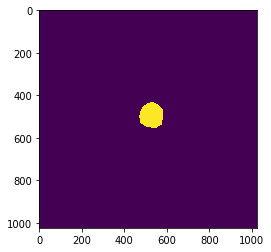

In [75]:
plt.imshow(gt_mask[:, : , 0])
plt.show()

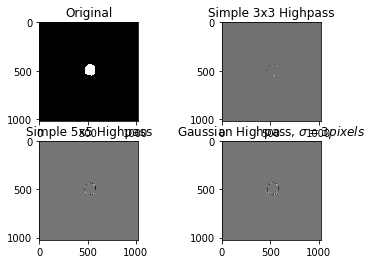

<Figure size 1656x936 with 0 Axes>

In [95]:
x  = gt_mask[:, : , 0]

import matplotlib.pyplot as plt
import numpy as np

def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the data...
im = x 
data = np.array(im, dtype=float)
plot(data, 'Original')

# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

# A slightly "wider", but sill very simple highpass filter 
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')

plt.figure(figsize=(23,13))


plt.show()

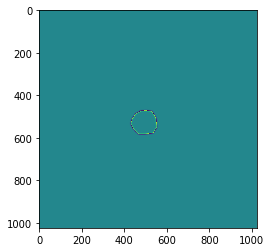

In [44]:
plt.imshow(gt_mask[:,:,0])

In [21]:
class_ids_count = dict()
r_class_ids_count = dict()
count_img = []
for image_id in tqdm(dataset.image_ids):
   # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config,
                               image_id, use_mini_mask=False)
    ids_counter = dict(Counter(gt_class_id))
    count_img.append(sum(ids_counter.values()))
    class_ids_count = {k: class_ids_count.get(k, 0) + ids_counter.get(k, 0) \
                       for k in set(class_ids_count) | set(ids_counter)}
    
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0) 

print(class_ids_count)
#print(r_class_ids_count)


{1: 160, 2: 1381, 4: 5, 5: 172}


In [22]:
max(count_img)

62

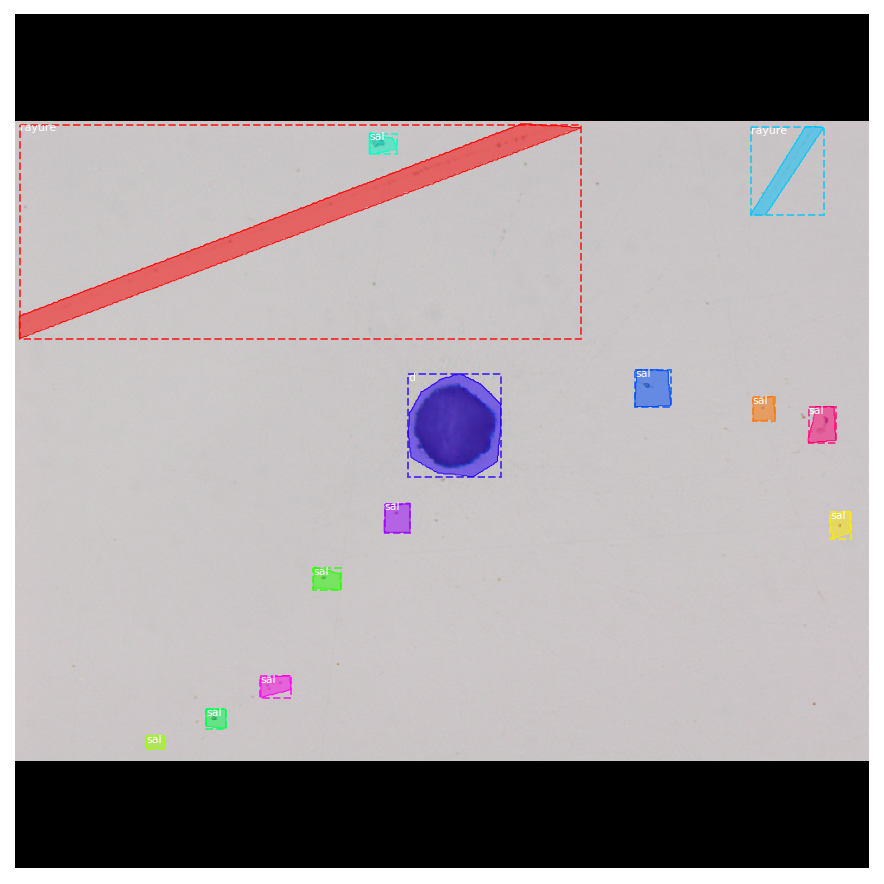

In [70]:
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    padding=config.IMAGE_PADDING)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

(1024, 1024)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

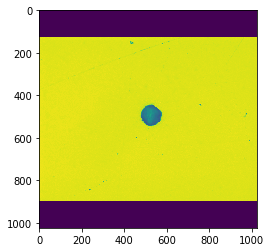

In [71]:
a = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
print(a.shape)
plt.imshow(a)
a

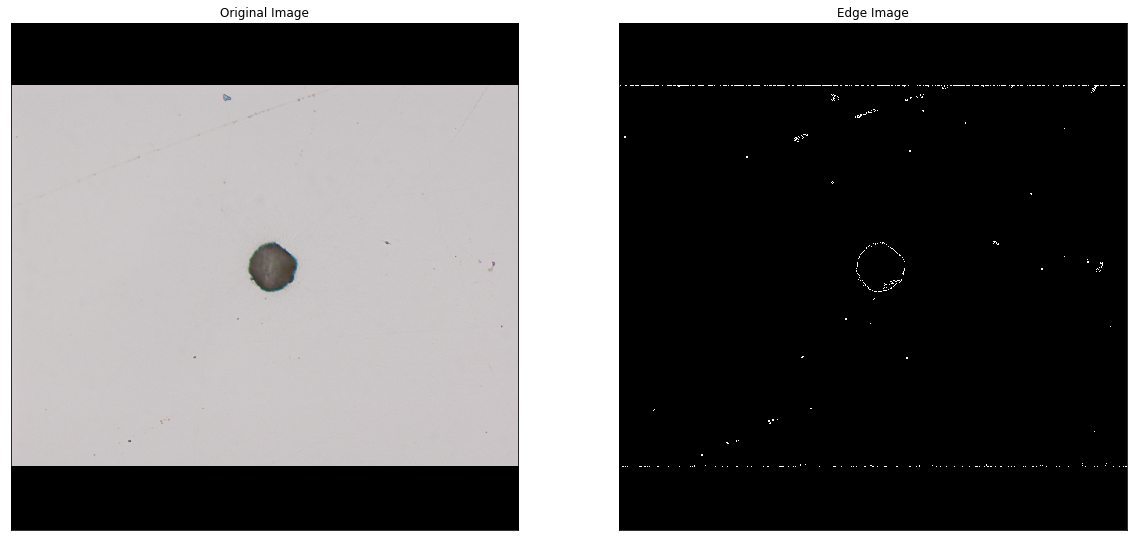

In [50]:
#img = cv.imread('/Users/kwassibenocharlesdokodjo/Desktop/x15u5_bis_test/val/1.jpg',0)
image_gray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
edges = cv.Canny(image_gray, 10, 95)

plt.figure(figsize=(20,15))

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [39]:
gt_mask.shape

(13, 1024, 1024)

In [ ]:
tbg = pd.read_excel('Tableau_Validation_Global.xlsx')

In [18]:
tbg.head()
print(tbg.shape)

(25018, 13)


In [13]:
a = tbg[tbg.Score_pred<0.9]
a.shape

(5248, 13)

In [42]:
a[a.Recovery_rate_25 == 1]

Id_obj                Bbox_gt  Class_gt          Bbox_pred  \
89       Image_0  [ 596  978  628 1003]         2  [605 980 624 999]   
547      Image_6      [671 955 701 991]         2  [676 960 698 981]   
549      Image_6      [514 808 540 844]         2  [519 811 537 835]   
814     Image_10      [590  63 612  86]         2  [587  63 613  87]   
940     Image_11      [550 589 567 607]         2  [548 587 566 606]   
...          ...                    ...       ...                ...   
24545  Image_259      [345 331 637 370]         1  [341 325 644 372]   
24559  Image_260      [345 490 372 530]         5  [341 485 375 527]   
24570  Image_260      [862 341 892 373]         2  [861 345 892 376]   
24718  Image_263      [817 385 856 423]         2  [819 382 852 421]   
24855  Image_263      [516 708 540 741]         2  [518 712 533 731]   

       Obj_pred  Score_pred       IOU  Proximity  Recovery_rate_1  \
89            2    0.864497  0.451250          1                1   
547           2    0.807402  0.427778          1                1   
549           2    0.830187  0.461538          1                1   
814           2    0.846377  0.810897          1                1   
940           2    0.841029  0.723404          1                1   
...         ...         ...       ...        ...              ...   
24545         1    0.859236  0.799663          1                1   
24559         2    0.815385  0.662028          1                1   
24570         2    0.893755  0.777058          1                1   
24718         2    0.838278  0.751423          1                1   
24855         2    0.887549  0.359848          1                1   

       Recovery_rate_25  Recovery_rate_50  Recovery_rate_75  Recovery_rate_90  
89                    1                 0                 0                 0  
547                   1                 0                 0                 0  
549                   1                 0                 0                 0  
814                   1                 1                 1                 0  
940                   1                 1                 0                 0  
...                 ...               ...               ...               ...  
24545                 1                 1                 1                 0  
24559                 1                 1                 0                 0  
24570                 1                 1                 1                 0  
24718                 1                 1                 1                 0  
24855                 1                 0                 0                 0  

[136 rows x 13 columns]

In [58]:
eval_metrics.eval_classif(tbg, 0.8, 1)

Seuil:  0.8 Pourcentage d'objets trouvés:  100.0 %
Taux de recouvrement considéré:  1 Pourcentage d'objets trouvés:  4.585 %


94.943

In [ ]:
cv.O